# Abalone Case Study

Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('Abalone case.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.shape

(4177, 9)

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [7]:
# Find NA Value
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
# Convert String
df = df.apply(LabelEncoder().fit_transform)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [9]:
# To Check Correlation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036006,-0.038846,-0.040559,-0.026480,-0.009979,-0.035252,-0.035159,-0.034546
Length,-0.036006,1.000000,0.986815,0.898495,0.945616,0.923686,0.914853,0.925637,0.556666
Diameter,-0.038846,0.986815,1.000000,0.904767,0.946053,0.919422,0.911692,0.932714,0.574718
Height,-0.040559,0.898495,0.904767,1.000000,0.900422,0.855481,0.874504,0.906738,0.608239
Whole weight,-0.026480,0.945616,0.946053,0.900422,1.000000,0.973950,0.966996,0.966973,0.554945
Shucked weight,-0.009979,0.923686,0.919422,0.855481,0.973950,1.000000,0.940029,0.909816,0.442772
Viscera weight,-0.035252,0.914853,0.911692,0.874504,0.966996,0.940029,1.000000,0.926469,0.513213
Shell weight,-0.035159,0.925637,0.932714,0.906738,0.966973,0.909816,0.926469,1.000000,0.630742
Rings,-0.034546,0.556666,0.574718,0.608239,0.554945,0.442772,0.513213,0.630742,1.000000


# Visulaization

<AxesSubplot:>

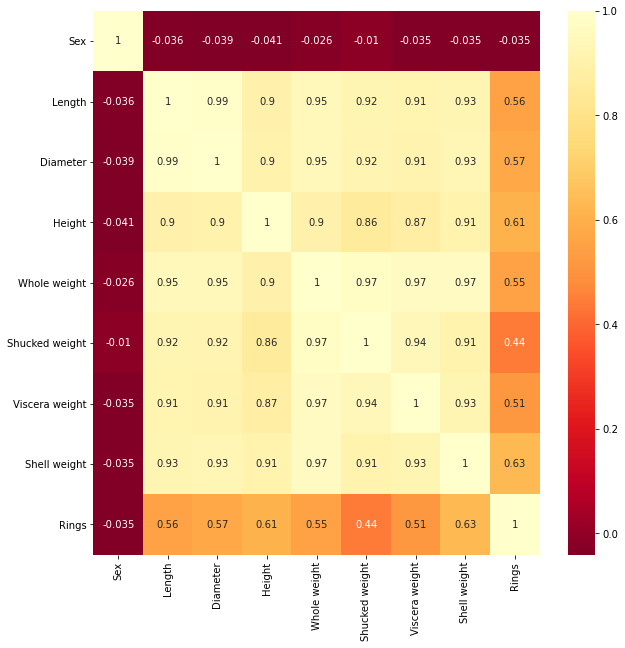

In [10]:
# Correlation in Visulaization 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='YlOrRd_r',annot=True)

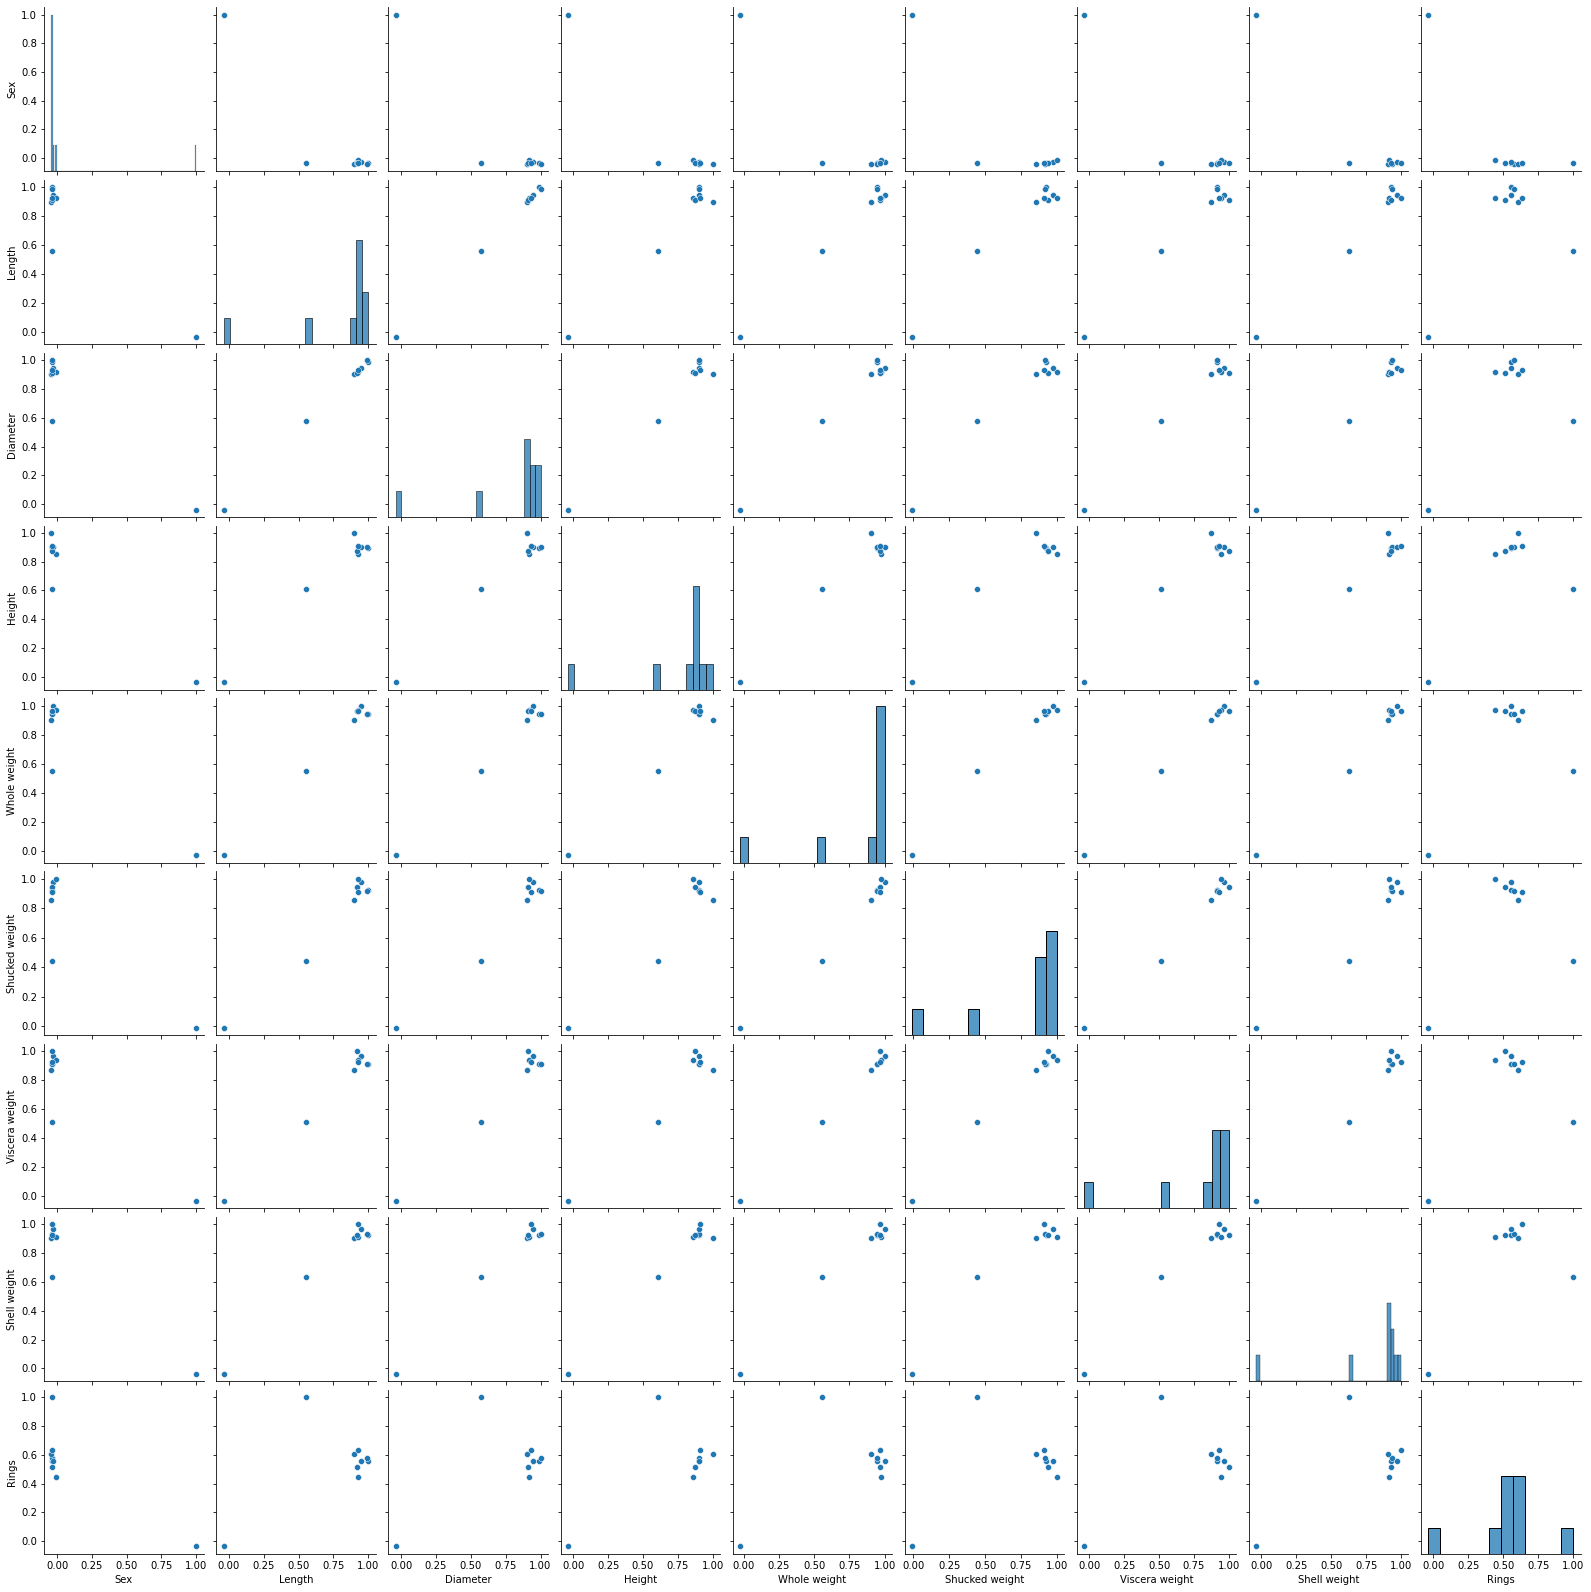

In [11]:
sns.pairplot(df.corr())

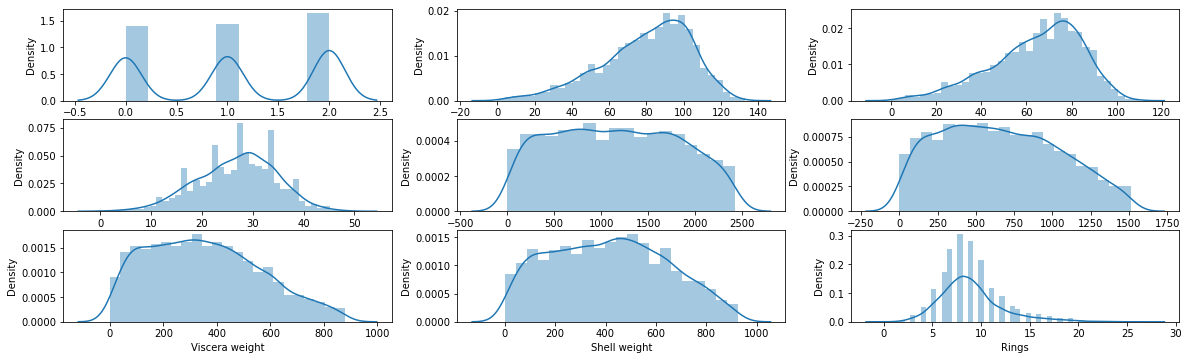

In [12]:
plt.figure(figsize=[20,20])
for i, column in enumerate(df.columns):
    plt.subplot(10,3,i+1)
    sns.distplot(df[column],kde=True)

<AxesSubplot:xlabel='Rings', ylabel='count'>

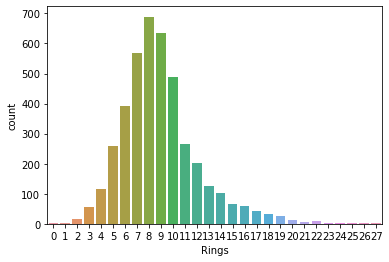

In [13]:
sns.countplot(df['Rings'])

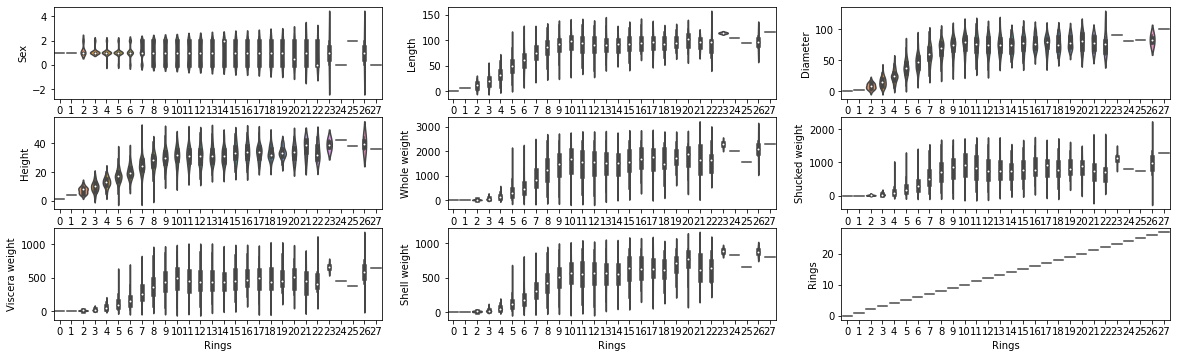

In [14]:
plt.figure(figsize=[20,20])
for i,column in enumerate(df.columns):
    plt.subplot(10,3,i+1)
    sns.violinplot(data=df,x='Rings',y=column)

# Find the Outliers and Remove

Sex                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Length            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Diameter          AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Height            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Whole weight      AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Shucked weight    AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Viscera weight          AxesSubplot(0.125,0.125;0.110714x0.343182)
Shell weight         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Rings                AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

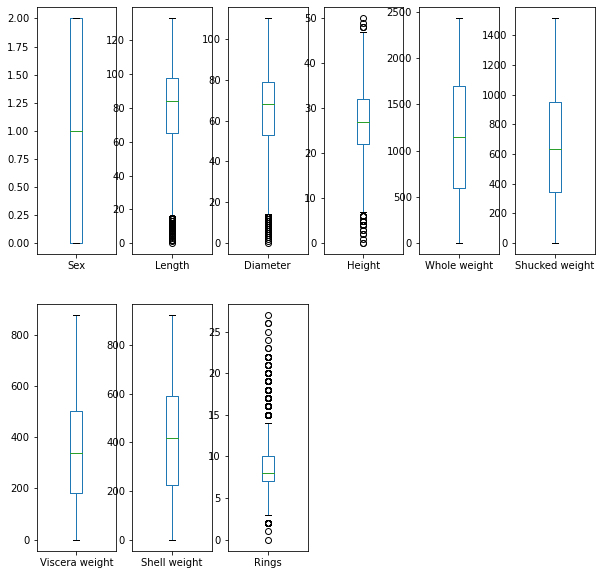

In [15]:
df.plot(kind='box',subplots=True, layout=(2,6),figsize=(10,10))

In [16]:
X = df.iloc[:,:-1]
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,66,56,18,715,417,199,263
1,2,45,36,17,285,178,94,113
2,0,81,67,26,962,480,280,374
3,2,63,56,24,718,400,225,273
4,1,41,34,15,253,159,76,87
...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442
4173,2,93,71,26,1411,832,426,463
4174,2,95,78,40,1727,994,571,550
4175,0,100,80,29,1610,1005,518,530


In [17]:
# Remove Outlire with z-score Method
z_score = np.abs(stats.zscore(X))
z_score

array([[1.15198011, 0.57514482, 0.43232856, ..., 0.62848601, 0.74055949,
        0.65546208],
       [1.15198011, 1.45029839, 1.44044354, ..., 1.24994198, 1.24207391,
        1.30958261],
       [1.28068972, 0.04996488, 0.12213469, ..., 0.46467125, 0.35367695,
        0.17141288],
       ...,
       [1.15198011, 0.63340059, 0.67659793, ..., 0.87184913, 1.03623442,
        0.59608854],
       [1.28068972, 0.84177049, 0.77740943, ..., 0.9004517 , 0.78308905,
        0.50887247],
       [1.15198011, 1.55022814, 1.48308992, ..., 2.0861585 , 1.80522318,
        1.74297987]])

In [18]:
threshold = 3
print(np.where(z_score>3))

(array([ 236,  236,  236,  237,  237,  238,  238,  239,  526,  526,  694,
        694,  696,  696,  719,  719,  720,  720, 1174, 1257, 1429, 1429,
       1986, 1987, 1987, 2051, 2114, 2114, 2169, 2381, 3837, 3899, 3899,
       3902, 3902, 3996], dtype=int64), array([1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2,
       1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 1, 3, 3], dtype=int64))


In [19]:
df.shape

(4177, 9)

In [20]:
# Removing Outliers
df = df[(z_score<3).all(axis=1)]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [21]:
df.iloc[:,-1].value_counts()

8     688
9     634
7     566
10    487
6     391
11    267
5     258
12    203
13    126
4     113
14    103
15     67
16     58
3      48
17     42
18     32
19     26
20     14
2      10
22      9
21      6
26      2
23      2
25      1
24      1
27      1
Name: Rings, dtype: int64

# Spliting Features and Target column

In [22]:
X = df.iloc[:,:-1]
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,66,56,18,715,417,199,263
1,2,45,36,17,285,178,94,113
2,0,81,67,26,962,480,280,374
3,2,63,56,24,718,400,225,273
4,1,41,34,15,253,159,76,87
...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442
4173,2,93,71,26,1411,832,426,463
4174,2,95,78,40,1727,994,571,550
4175,0,100,80,29,1610,1005,518,530


In [23]:
y = df.iloc[:,-1]
y

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4155, dtype: int64

In [24]:
y.value_counts()

8     688
9     634
7     566
10    487
6     391
11    267
5     258
12    203
13    126
4     113
14    103
15     67
16     58
3      48
17     42
18     32
19     26
20     14
2      10
22      9
21      6
26      2
23      2
25      1
24      1
27      1
Name: Rings, dtype: int64

# Checking for Variance Inflation Factor (VIF) and Remove

In [25]:
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF')

,VIF,columns
0,2.520395,Sex
6,62.363698,Viscera weight
3,74.847661,Height
7,108.151582,Shell weight
5,116.533950,Shucked weight
4,424.621264,Whole weight
1,474.168706,Length
2,500.716448,Diameter


In [26]:
X.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [27]:
# Removing Multi-colinerity 
X = df.iloc[:,:-1]
X = X.drop(['Diameter','Whole weight'],axis=1)
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['column'] = X.columns
df_info.sort_values('VIF')

,VIF,column
0,2.515372,Sex
5,39.626733,Shell weight
3,41.384858,Shucked weight
4,44.893522,Viscera weight
2,71.611259,Height
1,87.050991,Length


# Checking for skewness and Remove

In [28]:
df.skew().sort_values()

Length           -0.580671
Diameter         -0.557986
Height           -0.183734
Sex              -0.098854
Whole weight      0.078513
Shell weight      0.139789
Shucked weight    0.239355
Viscera weight    0.368552
Rings             1.145136
dtype: float64

In [29]:
X_transform = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transform,columns=X.columns)
X

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
0,1.124584,-0.692898,-1.185447,-0.533667,-0.660465,-0.583487
1,1.124584,-1.460296,-1.309753,-1.334196,-1.353998,-1.386843
2,-1.305741,-0.051391,-0.152709,-0.354469,-0.226978,-0.080398
3,1.124584,-0.812243,-0.416737,-0.583680,-0.514572,-0.535848
4,-0.009157,-1.587376,-1.554660,-1.411386,-1.500579,-1.553356
...,...,...,...,...,...,...
4150,-1.305741,0.272319,0.659508,0.208296,0.642882,0.205281
4151,1.124584,0.512583,-0.152709,0.522019,0.440814,0.290770
4152,1.124584,0.610752,1.783333,0.877578,1.015525,0.633296
4153,-1.305741,0.861237,0.249804,0.900920,0.813276,0.556091


In [30]:
X.skew().sort_values()

Shell weight     -0.190392
Sex              -0.176932
Shucked weight   -0.175589
Length           -0.165057
Viscera weight   -0.139078
Height           -0.056575
dtype: float64

# Train Test Split Method

In [31]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=41)

In [32]:
print(X_train.shape,y_train.shape)

(2783, 6) (2783,)


In [33]:
print(X_test.shape,y_test.shape)

(1372, 6) (1372,)


# Logistic Regresison Model

In [34]:
logisticRegression = LogisticRegression()

In [35]:
logisticRegression.fit(X_train,y_train)

C:\Users\gahlo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_predict = logisticRegression.predict(X_test)
y_predict

array([ 8,  8,  8, ..., 12, 10,  9], dtype=int64)

In [37]:
logisticRegression.score(X_test,y_test)

0.271865889212828

In [38]:
confusion_matrix(y_test,y_predict)

array([[ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 11,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16, 11,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  8, 28, 38, 16,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8, 11, 50, 44, 11,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  4, 30, 67, 63, 15,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4, 15, 41, 95, 58,  7,  0,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4, 16, 16, 75, 74, 24,  2,  3,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3, 11, 47, 69, 32,  1,  3,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

# Grid Search CV Model

In [39]:
param_grid = {'penalty' : ['l1','l2'],'C': [0.001,0.01,0.1,1,10,100,1000],'solver' : ['liblinear']}
cv = GridSearchCV(LogisticRegression(),param_grid=param_grid,n_jobs=10)

In [40]:
cv.fit(X_train,y_train)

C:\Users\gahlo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [41]:
cv.best_score_

0.2468613977758547

In [42]:
cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

# Cross Validation Model

In [43]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(LogisticRegression(C=1,penalty='l1',solver='liblinear'),X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.24548656163113997
std: 0.023477571771298562


In [44]:
pickle.dump(logisticRegression,open('logistic_regression.pkl','wb'))

# Decision Tree Classifier

In [45]:
decisionTreeClassifier = DecisionTreeClassifier(max_depth=10)

In [46]:
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [47]:
y_pred = decisionTreeClassifier.predict(X_test)

In [48]:
metrics.accuracy_score(y_test,y_pred)

0.2434402332361516

# Grid Search CV Model

In [49]:
param_grid = {'criterion': ['entropy','gini'],'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_leaf': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],}
cv = GridSearchCV(DecisionTreeClassifier(max_depth=10),param_grid=param_grid,n_jobs=10)
cv.fit(X_train,y_train)

C:\Users\gahlo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10), n_jobs=10,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                              20, 30, 40, 50, 70, 90, 120,
                                              150]})

In [50]:
cv.best_score_

0.2698565025896697

In [51]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}

# Cross Validation Model

In [52]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf=30),X,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.2661804911955514
std: 0.02103097005085742


In [53]:
pickle.dump(KFold,open('kfold.pkl','wb'))

# Support Vector Regression (SVM)

In [54]:
svc = SVC(kernel='linear')

In [55]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
y_pred = svc.predict(X_test)
y_pred

array([8, 8, 8, ..., 9, 9, 9], dtype=int64)

In [57]:
metrics.accuracy_score(y_test,y_pred)

0.271865889212828

# Grid Search CV Model

In [58]:
param_grid = {'C': [1,10,100],'kernel': ('linear','rbf'),'gamma' : [1e-3, 1e-4]}
cv = GridSearchCV(SVC(kernel='linear'),param_grid=param_grid,n_jobs=10)

In [59]:
cv.fit(X_train,y_train)

C:\Users\gahlo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=10,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ('linear', 'rbf')})

In [60]:
cv.best_score_

0.2587131730881004

In [61]:
cv.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

# Cross Validation Model

In [62]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(SVC(C =  10, gamma = 0.001, kernel = 'linear'),X,y,cv=cv,scoring='accuracy',n_jobs=-1)

print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.2555815569972196
std: 0.02013313338448929


In [63]:
pickle.dump(svc,open('svc.pkl','wb'))

# KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)

In [65]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
y_pred = knn.predict(X_test)

In [67]:
metrics.accuracy_score(y_test,y_pred)

0.20043731778425655

# Grid Search CV Model

In [68]:
param_grid = {'n_neighbors': [2,3,5,11,19],'weights':['uniform','distance'],'metric' : ['euclidean','manhattan']}
cv = GridSearchCV(KNeighborsClassifier(n_neighbors=5),param_grid=param_grid,n_jobs=10)

In [69]:
cv.fit(X_train,y_train)

C:\Users\gahlo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 11, 19],
                         'weights': ['uniform', 'distance']})

In [70]:
cv.best_score_

0.24937550856980484

In [71]:
cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}

# Cross Validation Model

In [72]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(KNeighborsClassifier(metric= 'euclidean', n_neighbors = 19, weights = 'uniform'),X,y,cv=cv,scoring='accuracy',n_jobs=-1)

print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.23826517608897127
std: 0.020549292897006223


In [73]:
pickle.dump(knn,open('knn.pkl','wb'))

#                                        Best Model is Support Vector Regression (SVM) with 27%